## import stuff

In [1]:
#importing things
import pandas as pd
import os
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import sem
import scipy.stats as st
from scipy.linalg import hadamard
from scipy.stats import ttest_ind_from_stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from sklearn.manifold import TSNE
from scipy.stats import pearsonr
from collections import OrderedDict
import seaborn as sns
import colorsys
from functools import reduce
from scipy.optimize import curve_fit
from operator import itemgetter
import math
import matplotlib.colors as mcolors

def lighten_color(color, amount=0.5):  
    # --------------------- SOURCE: @IanHincks ---------------------
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

# correlation between replicates

In [2]:
ch65d = pd.DataFrame(pd.read_csv('../../Kd_inference/results_CH65/Kds/Kds_CH65d.tsv',delimiter='\t',dtype={'geno': str}),columns=('geno', 'Mean fluorescence expression'))
ch65e = pd.DataFrame(pd.read_csv('../../Kd_inference/results_CH65/Kds/Kds_CH65e.tsv',delimiter='\t',dtype={'geno': str}),columns=('geno', 'Mean fluorescence expression'))
kd = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20220603_CH65_QCfilt_REPfilt.csv',delimiter=',',dtype={'geno': str}),columns=('geno','MA90_mean','SI06_mean','G189E_mean'))
#merge on genotype
CH65_expression = pd.DataFrame()
CH65_expression = pd.merge(ch65d, ch65e, on='geno',how='outer')
CH65_expression = pd.merge(CH65_expression, kd, on='geno',how='outer')
CH65_expression['som_mut']=CH65_expression['geno'].apply(sum_digits)
print(np.mean(CH65_expression['Mean fluorescence expression_x']),np.mean(CH65_expression['Mean fluorescence expression_y']))
CH65_expression['exp_repd_norm']=CH65_expression['Mean fluorescence expression_x']/np.mean(CH65_expression['Mean fluorescence expression_x'])
CH65_expression['exp_repe_norm']=CH65_expression['Mean fluorescence expression_y']/np.mean(CH65_expression['Mean fluorescence expression_y'])
CH65_expression['exp_norm_mean']=CH65_expression[['exp_repd_norm','exp_repe_norm']].mean(axis=1)
CH65_expression['exp_norm_sem']=CH65_expression[['exp_repd_norm','exp_repe_norm']].sem(axis=1)
CH65_expression.to_csv('CH65_expression_Kd_toplot.csv')
CH65_expression

3.4116523961323058 3.385740746771407


,geno,Mean fluorescence expression_x,Mean fluorescence expression_y,MA90_mean,SI06_mean,G189E_mean,som_mut,exp_repd_norm,exp_repe_norm,exp_norm_mean,exp_norm_sem
0,0000000000000000,3.568899,3.277206,8.542521,6.000000,6.000000,0,1.046091,0.967943,1.007017,0.039074
1,0000000000000001,3.416304,3.192240,8.574179,6.000000,6.000000,1,1.001364,0.942848,0.972106,0.029258
2,0000000000000010,3.555357,3.377397,8.315518,6.000000,6.000000,1,1.042122,0.997536,1.019829,0.022293
3,0000000000000011,3.571305,3.613703,8.473877,6.000000,6.000000,2,1.046796,1.067330,1.057063,0.010267
4,0000000000000100,3.576899,3.241554,8.537724,6.000000,6.000000,1,1.048436,0.957413,1.002925,0.045511
...,...,...,...,...,...,...,...,...,...,...,...
65531,1111111111111011,3.226016,3.476313,10.106582,9.141153,9.646027,15,0.945588,1.026751,0.986169,0.040582
65532,1111111111111100,3.112689,3.371669,10.065900,8.789993,9.500674,14,0.912370,0.995844,0.954107,0.041737
65533,1111111111111101,3.474310,3.492683,10.133731,9.010419,9.528151,15,1.018366,1.031586,1.024976,0.006610
65534,1111111111111110,3.565554,3.442400,9.967843,8.625453,9.467154,15,1.045111,1.016735,1.030923,0.014188


/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


0.28326270957329946


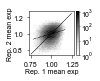

In [37]:
#CH65
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_repd_norm', 'exp_repe_norm']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_repd_norm'], plotting['exp_repe_norm'],cmap='Greys',bins='log',linewidths=0.2,gridsize=25)
plt.xlabel("Rep. 1 mean exp",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2 mean exp",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x = plotting['exp_repd_norm']
y = plotting['exp_repe_norm']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([0.75,1.25])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['exp_repd_norm'], plotting['exp_repe_norm'])
m, b = np.polyfit(plotting['exp_repd_norm'], plotting['exp_repe_norm'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('images/CH65_expcorr.png',transparent=True, dpi=600,bbox_inches='tight')

# correlation between expression and binding

-0.152732288752006


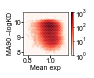

In [20]:
#CH65 MA90 
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_norm_mean', 'MA90_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_norm_mean'], plotting['MA90_mean'],cmap='Reds',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("Mean exp",fontsize=7,labelpad=1)
plt.ylabel("MA90 –logKD",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_norm_mean']
y = plotting['MA90_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_norm_mean'], plotting['MA90_mean'])
print(corr)
plt.savefig('images/CH65_exp_vs_MA90.png',transparent=True, dpi=600,bbox_inches='tight')

-0.11588708987639534


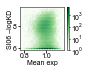

In [19]:
#CH65 SI06 
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_norm_mean', 'SI06_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_norm_mean'], plotting['SI06_mean'],cmap='Greens',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("Mean exp",fontsize=7,labelpad=1)
plt.ylabel("SI06 –logKD",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_norm_mean']
y = plotting['SI06_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_norm_mean'], plotting['SI06_mean'])
print(corr)
plt.savefig('images/CH65_exp_vs_SI06.png',transparent=True, dpi=600,bbox_inches='tight')

-0.11298611588107897


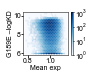

In [18]:
#CH65 G189E 
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_norm_mean', 'G189E_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_norm_mean'], plotting['G189E_mean'],cmap='Blues',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("Mean exp",fontsize=7,labelpad=1)
plt.ylabel("G189E –logKD",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_norm_mean']
y = plotting['G189E_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_norm_mean'], plotting['G189E_mean'])
print(corr)
plt.savefig('images/CH65_exp_vs_G189E.png',transparent=True, dpi=600,bbox_inches='tight')

# change in expression by mutation position

In [4]:
import matplotlib
import matplotlib.colors as mcolors
plt.rcParams.update({'font.size': 7})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5

In [3]:
#read in data
dExp = pd.DataFrame(pd.read_csv('20220603_CH65_dExp.csv',dtype={'source':'str', 'target':'str'}))
dExp

,Mutation,dexp,Number of mutations,dexp_sem,source,target,pos1,pos2,pos3,pos4,...,pos7,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16
0,N26D,0.008725,0,0.060093,0000000000000000,1000000000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N26D,-0.050082,1,0.039410,0000000000000001,1000000000000001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,N26D,-0.020489,1,0.027083,0000000000000010,1000000000000010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,N26D,-0.005048,2,0.020932,0000000000000011,1000000000000011,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,N26D,0.032526,1,0.048260,0000000000000100,1000000000000100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524283,R87K,-0.069743,14,0.089554,1111111111110110,1111111111110111,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
524284,R87K,0.088863,13,0.024843,1111111111111000,1111111111111001,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
524285,R87K,0.035249,14,0.042192,1111111111111010,1111111111111011,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
524286,R87K,-0.070869,14,0.042257,1111111111111100,1111111111111101,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


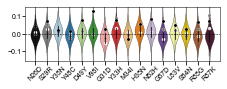

In [41]:
##Expression
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Mutation", y="dexp", data=dExp,scale='count',linewidth=0.25,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
sns.scatterplot(x="Mutation", y="dexp", data=dExp[(dExp['source']=='0000000000000000')],color='white',s=10)
sns.scatterplot(x="Mutation", y="dexp", data=dExp[(dExp['source']=='0000001010100000')],color='gray',s=10)
sns.scatterplot(x="Mutation", y="dexp", data=dExp[(dExp['target']=='1111111111111111')],color='black',s=10)
ax.set_xticklabels(['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K'],rotation=45)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_dExp.png',transparent=True, dpi=600,bbox_inches='tight')


# change in expression by number of mutations

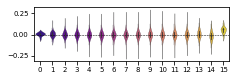

In [8]:
##expression
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Number of mutations", y="dexp", data=dExp,scale='area',linewidth=0.25,palette='plasma')
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',
    pad=2,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_dExp_num.png',transparent=True, dpi=600,bbox_inches='tight')


## do some statistics

In [10]:
#do a two-sided t-test to see if mean is different from zero
Exp_dKd_mean = []
Exp_dKd_sem = []
#Exp
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for mutation_name in mutation_names:
    vals_1 = np.array(dExp['dexp'][dExp['Mutation']==mutation_name])
    mean = np.nanmean(vals_1)
    sem = st.sem(vals_1, nan_policy='omit')
    Exp_dKd_mean.append(mean)
    Exp_dKd_sem.append(sem)
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(mutation_name,tstat,pval,n1,n2,lab)
print(Exp_dKd_mean)
print(Exp_dKd_sem)

N26D -15.797099869078014 5.246259226967092e-56 32768 1 ***
S29R 22.088609725492805 2.474849961755335e-107 32768 1 ***
Y35N 57.65449666026254 0.0 32768 1 ***
Y48C -15.560482785697848 2.1158308953606463e-54 32768 1 ***
D49Y 24.335996230958255 1.1582499767901997e-129 32768 1 ***
V98I 24.84107941455848 5.743591868169765e-135 32768 1 ***
G31D -81.00431525901051 0.0 32768 1 ***
Y33H 17.490406031301596 3.4631611912823492e-68 32768 1 ***
M34I -28.43877492993828 9.210345218561128e-176 32768 1 ***
H35N 60.34203146419079 0.0 32768 1 ***
N52H 39.78156071722523 0.0 32768 1 ***
G57D -67.01215660744492 0.0 32768 1 ***
L83V 7.846713135555945 4.400097877629404e-15 32768 1 ***
S84N -5.0037562608497375 5.651451017233798e-07 32768 1 ***
R85G -48.02261943621673 0.0 32768 1 ***
R87K -42.08982861537862 0.0 32768 1 ***
[-0.003966617823195643, 0.005581634617802548, 0.01474287656308372, -0.004025206438627355, 0.006322794282177787, 0.006384879584889007, -0.0214158791496474, 0.004614196021260216, -0.0075064751823

## CH65: correlation between mean change in expression and mean change in binding for each site

In [42]:
#read in data for change in Kd
toplot = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/dKd_summary.csv'),index=None)
toplot['dExp_mean'] = Exp_dKd_mean
toplot['dExp_sem'] = Exp_dKd_sem
toplot['sum']=abs(toplot['MA90_dKd_mean'])+abs(toplot['SI06_dKd_mean'])+abs(toplot['G189E_dKd_mean'])
toplot['total_err']=((toplot['MA90_dKd_sem'])**2+(toplot['SI06_dKd_sem'])**2+(toplot['G189E_dKd_sem'])**2)**(1/2)
toplot


,Unnamed: 0,mutation_names,MA90_dKd_mean,MA90_dKd_sem,SI06_dKd_mean,SI06_dKd_sem,G189E_dKd_mean,G189E_dKd_sem,dExp_mean,dExp_sem,sum,total_err
0,0,N26D,-0.005894,0.000337,0.125206,0.001299,-0.023788,0.001398,-0.003967,0.000251,0.154888,0.001938
1,1,S29R,0.051353,0.000379,0.142751,0.001495,0.282864,0.002014,0.005582,0.000253,0.476967,0.002537
2,2,Y35N,0.475922,0.001182,0.350730,0.003493,0.948471,0.004559,0.014743,0.000256,1.775124,0.005864
3,3,Y48C,-0.009082,0.001902,0.045927,0.003476,-0.019971,0.004269,-0.004025,0.000259,0.074980,0.005825
4,4,D49Y,0.245354,0.001940,0.423951,0.004313,0.608515,0.004755,0.006323,0.000260,1.277820,0.006706
5,5,V98I,0.013609,0.000327,0.041254,0.000740,-0.017201,0.001353,0.006385,0.000257,0.072064,0.001577
6,6,G31D,0.150576,0.000671,0.160146,0.001502,0.556176,0.002757,-0.021416,0.000264,0.866897,0.003210
7,7,Y33H,0.245317,0.000842,0.262465,0.002520,0.381849,0.002535,0.004614,0.000264,0.889631,0.003672
8,8,M34I,0.016195,0.000453,0.114124,0.001381,0.109564,0.001620,-0.007506,0.000264,0.239883,0.002176
9,9,H35N,0.164149,0.000766,0.328146,0.003042,0.347584,0.003106,0.016067,0.000266,0.839879,0.004415


### plot correlation between sum of delta(-logKd) and delta(mean expression bin)

0.558433035811203


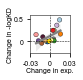

In [43]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dExp_mean'], toplot['MA90_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dExp_mean'], toplot['MA90_dKd_mean'])
plt.figure(figsize=(0.7,0.7))
ax = sns.scatterplot(x='dExp_mean', y='MA90_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dExp_sem'],xerr=toplot['MA90_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dExp_mean', y='MA90_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
plt.xlim(-0.03,0.03)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('Change in exp.',fontsize=7,labelpad=0.5)
plt.ylabel('Change in -logKD',fontsize=7,labelpad=0.5)
plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
plt.yticks(ticks=[0,0.5],labels=['0','0.5'],fontsize=7)
plt.savefig('images/CH65_deltaexp_kd_corr_MA90.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

0.4420183447523416


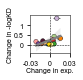

In [44]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dExp_mean'], toplot['SI06_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dExp_mean'], toplot['SI06_dKd_mean'])
plt.figure(figsize=(0.7,0.7))
ax = sns.scatterplot(x='dExp_mean', y='SI06_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dExp_sem'],xerr=toplot['SI06_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dExp_mean', y='SI06_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
plt.xlim(-0.03,0.03)
plt.xlabel('Change in exp.',fontsize=7,labelpad=0.5)
plt.ylabel('Change in -logKD',fontsize=7,labelpad=0.5)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
plt.yticks(ticks=[0,0.5,1],labels=['0','0.5','1'],fontsize=7)
plt.savefig('images/CH65_deltaexp_kd_corr_SI06.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

0.4242009252427109


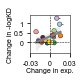

In [46]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dExp_mean'], toplot['G189E_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dExp_mean'], toplot['G189E_dKd_mean'])
plt.figure(figsize=(0.7,0.7))
ax = sns.scatterplot(x='dExp_mean', y='G189E_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dExp_sem'],xerr=toplot['G189E_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dExp_mean', y='G189E_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
plt.xlim(-0.03,0.03)
plt.xlabel('Change in exp.',fontsize=7,labelpad=0.5)
plt.ylabel('Change in -logKD',fontsize=7,labelpad=0.5)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
plt.yticks(ticks=[0,0.5,1],labels=['0','0.5','1'],fontsize=7)
plt.savefig('images/CH65_deltaexp_kd_corr_G189E.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

0.4774238110842812


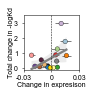

In [49]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dExp_mean'], toplot['sum'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dExp_mean'], toplot['sum'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='dExp_mean', y='sum',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dExp_sem'],xerr=toplot['total_err'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dExp_mean', y='sum',data=toplot, scatter=False, ax=ax,color='gray')
plt.xlim(-0.03,0.03)
plt.ylim(-0.1,3.5)
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('Change in expresison',fontsize=7,labelpad=0.5)
plt.ylabel('Total change in -logKd',fontsize=7,labelpad=0.5)
plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
plt.yticks(ticks=[0,1,2,3],labels=['0','1','2','3'],fontsize=7)
plt.savefig('images/CH65_deltaexp_kd_corr_sum.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

## correlation between isogenic and tite-seq

In [22]:
#read in data for change in Kd
exp_iso = pd.DataFrame(pd.read_csv('../Expression_Figures/Exp_corr_titeseq_isogenic.csv'),index=None)
exp_iso.head()

,shortname,Exp_titeseq,Exp_err_titeseq,Exp_isogenic_rep1,Exp_isogenic_rep2,Exp_isogenic,Exp_sem_isogenic
0,germline,1.007017,0.039074,15184.0,11821.3,13502.65,1681.35
1,somatic,0.955969,0.058458,11165.3,8312.5,9738.90,1426.40
2,"""0010000000100000""",0.972500,0.017137,10516.8,7891.1,9203.95,1312.85
3,"""0000001111100000""",1.017838,0.030960,13866.0,11373.7,12619.85,1246.15
4,"""0110010010111110""",0.998169,0.007851,10673.6,8820.0,9746.80,926.80


0.8891606458707701


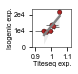

In [37]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(exp_iso['Exp_titeseq'], exp_iso['Exp_isogenic'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(exp_iso['Exp_titeseq'], exp_iso['Exp_isogenic'])
plt.figure(figsize=(0.7,0.7))
colors = ['firebrick','firebrick','firebrick','firebrick','firebrick','firebrick']
ax = sns.scatterplot(x='Exp_titeseq', y='Exp_isogenic',data=exp_iso,hue='shortname',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, xerr=exp_iso['Exp_err_titeseq'],yerr=exp_iso['Exp_sem_isogenic'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='Exp_titeseq', y='Exp_isogenic',data=exp_iso, scatter=False, ax=ax,color='gray')
#plt.xlim(-0.03,0.03)
plt.xlabel('Titeseq exp.',fontsize=7,labelpad=0.5)
plt.ylabel('Isogenic exp.',fontsize=7,labelpad=0.5)
plt.xticks(ticks=[0.9,1,1.1],labels=['0.9','1','1.1'],fontsize=7)
plt.yticks(ticks=[0,10000,20000],labels=['0','1e4','2e4'],fontsize=7)
plt.savefig('images/CH65_expcorr_titeseq_iso.png',transparent=True, dpi=1200,bbox_inches='tight')
print(corr)